In [64]:
import numpy as np
from nltk.corpus import stopwords
import string

import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [2]:
import matplotlib.pyplot as plt 

import seaborn as sns

%matplotlib inline


In [3]:
massages = pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
massages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
massages.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
massages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
massages.rename(columns = {"v1":"label","v2":"massage"}, inplace = True)

In [11]:
massages.head()

,label,massage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
massages.describe()

,label,massage
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
massages.groupby("label").describe()

massage                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
massages["length"] = massages["massage"].apply(len)

In [15]:
massages.head()

,label,massage,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
massages.groupby('length').describe()

label                  massage         \
       count unique  top freq   count unique   
length                                         
2          4      1  ham    4       4      1   
3          9      1  ham    9       9      5   
4          6      1  ham    6       6      3   
5         11      1  ham   11      11      2   
6          3      1  ham    3       3      3   
...      ...    ...  ...  ...     ...    ...   
588        2      1  ham    2       2      1   
611        1      1  ham    1       1      1   
632        1      1  ham    1       1      1   
790        1      1  ham    1       1      1   
910        1      1  ham    1       1      1   

                                                                
                                                      top freq  
length                                                          
2                                                      Ok    4  
3                                                     Ok.    4  
4                                                    Okie    4  
5                                                   Ok...   10  
6                                                  Yup...    1  
...                                                   ...  ...  
588     Sad story of a Man - Last week was my b'day. M...    2  
611     How to Make a girl Happy? It's not at all diff...    1  
632     Indians r poor but India is not a poor country...    1  
790     The last thing i ever wanted to do was hurt yo...    1  
910     For me the love should start with attraction.i...    1  

[274 rows x 8 columns]

## Exploratory data analysis

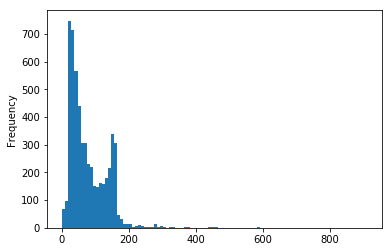

In [17]:
massages['length'].plot(bins = 100,kind = "hist")

In [18]:
massages.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

massages[massages['length '== 910]][massage].iloc[0]

In [ ]:
massages.hist(column = 'label',by = 'length',bins=50,figsize=(12,4))

## text preprocessing 

In [26]:
def text_processing(data):
    
    
    # Check characters to see if they are in punctuation
    data_punc = [char for char in data if char not in string.punctuation];
    
    data_punc ="".join(data_punc);
    
    
    return [word for word in data_punc.split() if word.lower() not in stopwords.words("english")];
    
    
    
    


In [27]:
massages["massage"].head(8).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
Name: massage, dtype: object

In [29]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(massages["massage"])

In [30]:
len(bow_transformer.vocabulary_)

11304

In [33]:
bow7 = bow_transformer.transform([massages["massage"][6]])

In [34]:
print(bow7)
print(bow7.shape)

  (0, 1777)	1
  (0, 4512)	1
  (0, 5111)	1
  (0, 7698)	2
  (0, 8653)	1
  (0, 9860)	1
  (0, 10513)	1
(1, 11304)


In [35]:
print(bow_transformer.get_feature_names()[7698])

like


In [39]:
messages_bow = bow_transformer.transform(massages['massage'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of Non-Zero occurences:  50193


In [40]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [43]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf7 = tfidf_transformer.transform(bow7)

In [44]:
print(tfidf7)

  (0, 10513)	0.33521441416639297
  (0, 9860)	0.32680848361658965
  (0, 8653)	0.43692878744892083
  (0, 7698)	0.4149098236609654
  (0, 5111)	0.3383712690711893
  (0, 4512)	0.43692878744892083
  (0, 1777)	0.33521441416639297


In [45]:
print(tfidf7.shape)

(1, 11304)


In [46]:
message_tfidf =  tfidf_transformer.transform(messages_bow)

print(message_tfidf.shape)

(5572, 11304)


## Train a model

In [51]:
x_train,x_test,y_train,y_test = train_test_split(message_tfidf,massages["label"],test_size =0.3)

In [53]:
spam_detect_model = MultinomialNB().fit(x_train,y_train)

In [55]:
prediction = spam_detect_model.predict(x_test)

In [56]:
print(prediction)

['spam' 'spam' 'ham' ... 'ham' 'ham' 'ham']


In [57]:
print(y_test)

4862    spam
4147    spam
820      ham
4146     ham
1935     ham
        ... 
1526     ham
3335     ham
2813     ham
4403     ham
896      ham
Name: label, Length: 1672, dtype: object


In [60]:
print(classification_report(y_test,prediction))

print("\n")

confusion_test = confusion_matrix(y_test,prediction)
pd.DataFrame(data = confusion_test,columns =["predicted_HAM","Predicted_SPAM"],index = ["Actual_HAM","Actual_SPAM"])

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1445
        spam       1.00      0.70      0.82       227

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672





,predicted_HAM,Predicted_SPAM
Actual_HAM,1445,0
Actual_SPAM,69,158


In [63]:
msg_train, msg_test, label_train, label_test = train_test_split(massages['massage'], massages['label'], test_size=0.3)

In [69]:
pipeline = Pipeline([("bow",CountVectorizer(analyzer=text_processing)),
                     ("tfidf",TfidfTransformer()),
                      ("classifier",SVC(kernel ="rbf"))])

In [70]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f890a568ea0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+...
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0

In [71]:
predictions = pipeline.predict(msg_test)

In [72]:
print(classification_report(label_test,predictions))

print("\n")

confusion_test = confusion_matrix(label_test,predictions)
pd.DataFrame(data = confusion_test,columns =["predicted_HAM","Predicted_SPAM"],index = ["Actual_HAM","Actual_SPAM"])

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1463
        spam       0.99      0.82      0.90       209

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672





,predicted_HAM,Predicted_SPAM
Actual_HAM,1462,1
Actual_SPAM,37,172
